In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#from ydata_profiling import ProfileReport #comentado por no funcionar con este kernel

Obteniendo data de la Wiki de Genshin Impact

In [2]:
charactersUrl = 'https://genshin-impact.fandom.com/wiki/Character'
charactersUrlStats = 'https://genshin-impact.fandom.com/wiki/Character/Comparison'
characters = pd.read_html(charactersUrl)
charactersStats = pd.read_html(charactersUrlStats)
df1 = characters[1]
df2 = charactersStats[0]
df1.sample(5)

,Icon,Name,Quality,Element,Weapon,Region,Model Type
19,NaN,Faruzan,NaN,Anemo,Bow,Sumeru,Medium Female
46,NaN,Ningguang,NaN,Geo,Catalyst,Liyue,Tall Female
4,NaN,Arataki Itto,NaN,Geo,Claymore,Inazuma,Tall Male
71,NaN,Yelan,NaN,Hydro,Bow,Liyue,Tall Female
40,NaN,Lyney,NaN,Pyro,Bow,Fontaine,Medium Male


Dropeando columnas con valores NaN

In [3]:
df3 = df1.drop(['Icon', 'Quality', 'Model Type'], axis = 1)
df4 = df2.drop(['Icon'], axis = 1)
df4

,Name,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
0,Albedo,13225,251,876,Geo DMG Bonus,28.8%
1,Alhaitham,13348,313,781,Dendro DMG Bonus,28.8%
2,Aloy,10898,233,676,Cryo DMG Bonus,28.8%
3,Amber,9461,223,600,ATK,24.0%
4,Arataki Itto,12858,227,959,CRIT Rate,19.2%
...,...,...,...,...,...,...
70,Yaoyao,12288,212,750,HP,24.0%
71,Yelan,14450,243,547,CRIT Rate,19.2%
72,Yoimiya,10164,322,614,CRIT Rate,19.2%
73,Yun Jin,10657,191,734,Energy Recharge,26.8%


Uniendo los dos Datasets con la key Name y guardandolo en df5

In [4]:
personajes_df = df3.merge(df4, on = 'Name')
personajes_df.sample(5)


,Name,Element,Weapon,Region,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
55,Shikanoin Heizou,Anemo,Catalyst,Inazuma,10657,225,683,Anemo DMG Bonus,24.0%
60,Traveler,None,Sword,None,10874,212,682,ATK,24.0%
58,Thoma,Pyro,Polearm,Inazuma,10331,201,750,ATK,24.0%
59,Tighnari,Dendro,Bow,Sumeru,10849,267,630,Dendro DMG Bonus,28.8%
69,Yanfei,Pyro,Catalyst,Liyue,9352,240,586,Pyro DMG Bonus,24.0%


--Comienza codigo nuevo para testear libreria de profiling

Agregando libreria ydata_profiling para acelerar el proceso de EDA

In [8]:

#profileData = ProfileReport(personajes_df, title = 'Genshin Impact Character Dataset', explorative = True)
#comentado por no funcionar con este kernel

Guardando el profile Data en un html para poder ver un analisis de los datos de forma rapida

In [10]:
#profileData.to_file('GenshinImpactCharacterDataset.html')
#comentado por no funcionar con este kernel

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 499.98it/s]


--- Continua codigo anterior

Dropeando otra columna no relevante

In [7]:
personajes_df = personajes_df.drop(['Ascension Stat Value'], axis = 1)
personajes_df

,Name,Element,Weapon,Region,HP,ATK,DEF,Ascension Stat
0,Albedo,Geo,Sword,Mondstadt,13225,251,876,Geo DMG Bonus
1,Alhaitham,Dendro,Sword,Sumeru,13348,313,781,Dendro DMG Bonus
2,Aloy,Cryo,Bow,None,10898,233,676,Cryo DMG Bonus
3,Amber,Pyro,Bow,Mondstadt,9461,223,600,ATK
4,Arataki Itto,Geo,Claymore,Inazuma,12858,227,959,CRIT Rate
...,...,...,...,...,...,...,...,...
70,Yaoyao,Dendro,Polearm,Liyue,12288,212,750,HP
71,Yelan,Hydro,Bow,Liyue,14450,243,547,CRIT Rate
72,Yoimiya,Pyro,Bow,Inazuma,10164,322,614,CRIT Rate
73,Yun Jin,Geo,Polearm,Liyue,10657,191,734,Energy Recharge


In [8]:
personajes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            75 non-null     object
 1   Element         75 non-null     object
 2   Weapon          75 non-null     object
 3   Region          75 non-null     object
 4   HP              75 non-null     int64 
 5   ATK             75 non-null     int64 
 6   DEF             75 non-null     int64 
 7   Ascension Stat  75 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.3+ KB


Primer grafico solo con los valores numericos del dataset

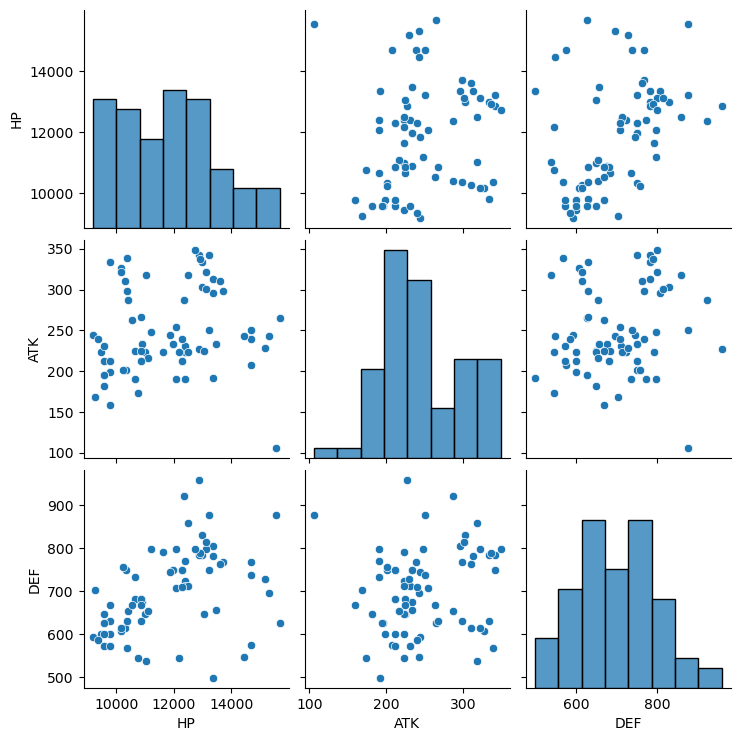

In [9]:
sns.pairplot(personajes_df)

Creando paleta de colores para que se relacione con los elementos del juego y haciendo grafico segun cantidad de personajes por tipo de elemento

BTW al actualizar el codigo despues de unos meses, la paleta de colores creada ya no funciona, por lo que se saco de los graficos pero se dejo igualmente en el codigo

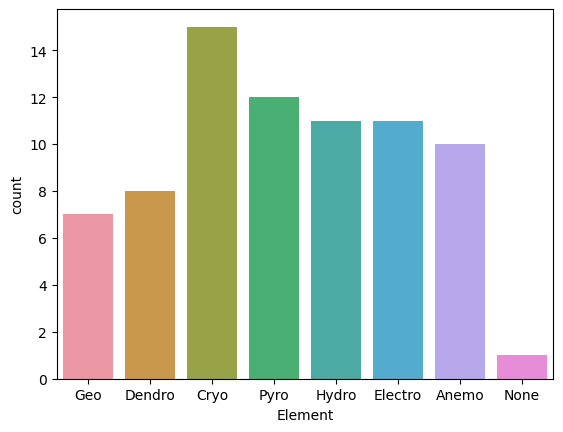

In [50]:
paletaColoresElementos = {"Pyro": "#FA1A0D", "Hydro": "#0D8BC4", "Geo": "#FD8D04", "Anemo": "#4CD95A", "Electro" : "#B071C1", "Cryo": "#85D8DF", "Dendro": "#7bb42d"}
sns.set_palette(sns.color_palette(paletaColoresElementos.values()))

sns.countplot(
    x='Element',
    data=personajes_df,
)
plt.show()

Creando visual conteo de diferentes armas

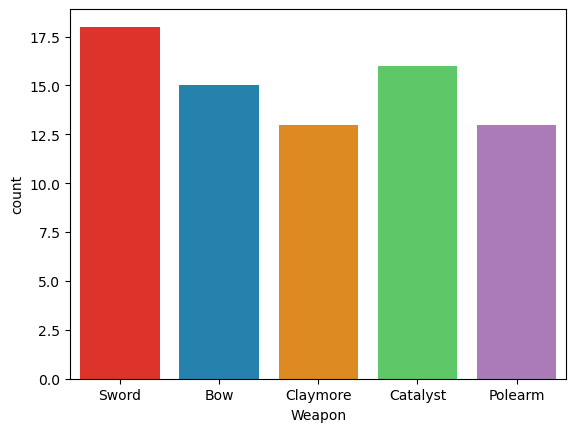

In [46]:
sns.countplot(
    x='Weapon',
    data=personajes_df,
)
plt.show()

Conteo de personajes segun region

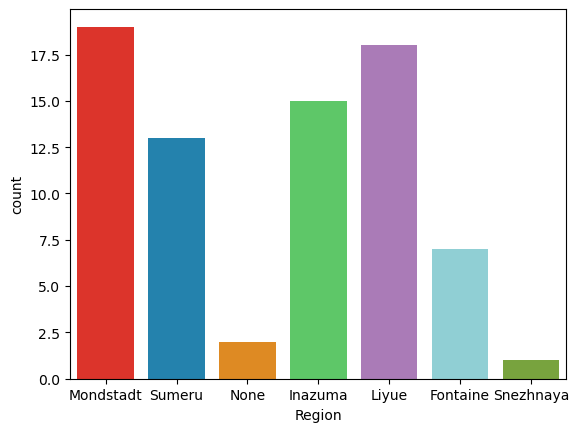

In [45]:
sns.countplot(
    x='Region',
    data=personajes_df
)
plt.show()

Scatter segun ATK/DEF, con tamanio segun la vida total, separado por regiones y colorizado por elemento.

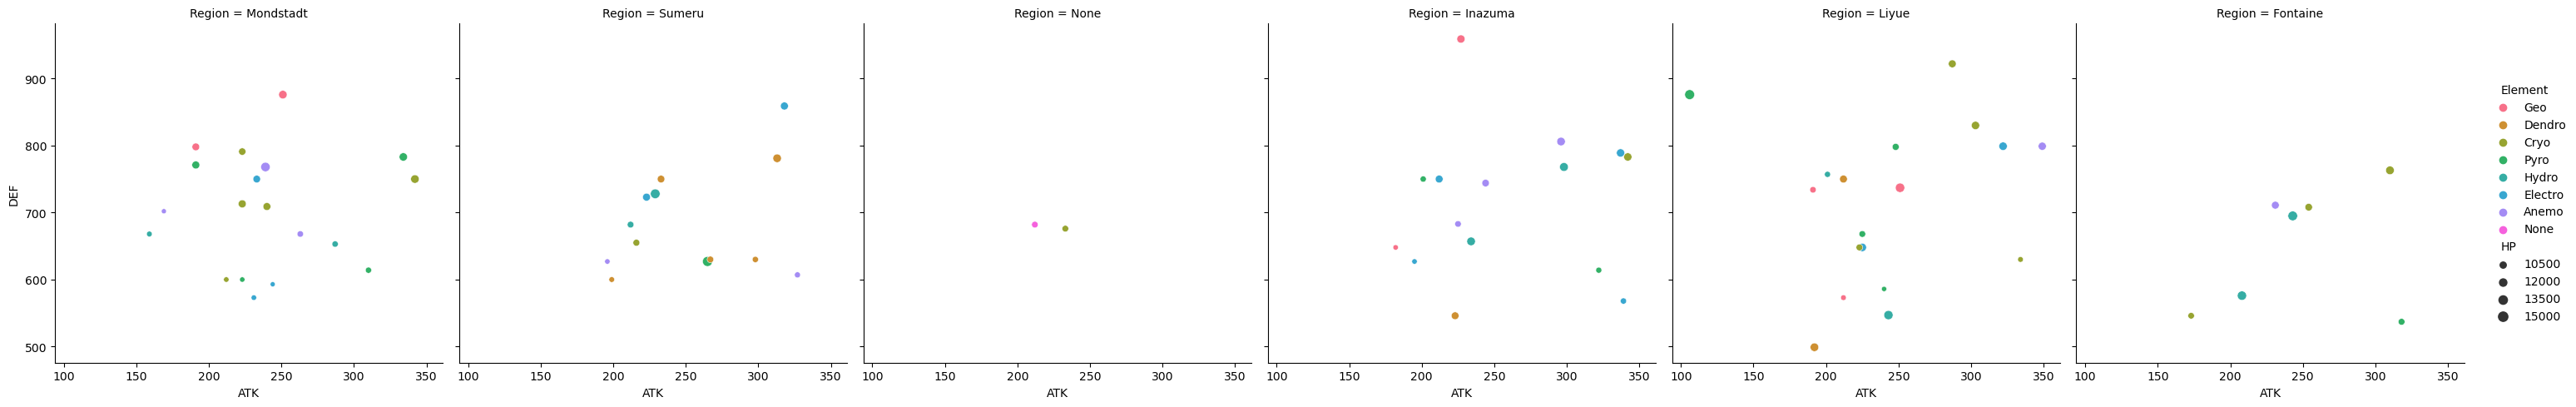

In [44]:
sns.relplot(
    data=personajes_df[personajes_df['Region'] != 'Snezhnaya'],
    x='ATK',
    y='DEF',
    col='Region',
    hue='Element',
    kind='scatter',
    size='HP',
)
plt.show()

Scatter para ver si existe alguna correlacion entre los atributos ATK-DEF-HP, segun region

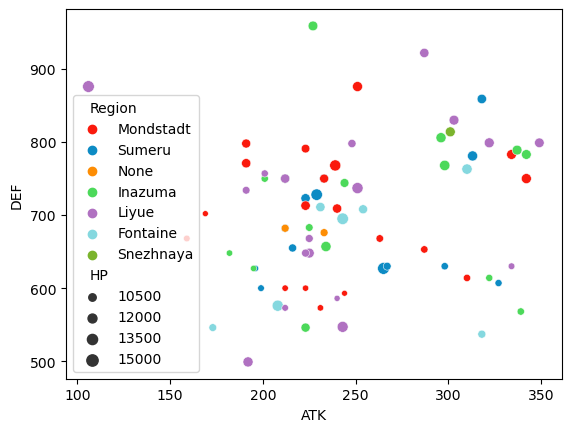

In [43]:
sns.scatterplot(
    data=personajes_df,
    x='ATK',
    y='DEF',
    size='HP',
    hue='Region',
)
plt.show()

Scatter para ver si existe alguna correlacion entre los atributos ATK-DEF-HP, segun Armas

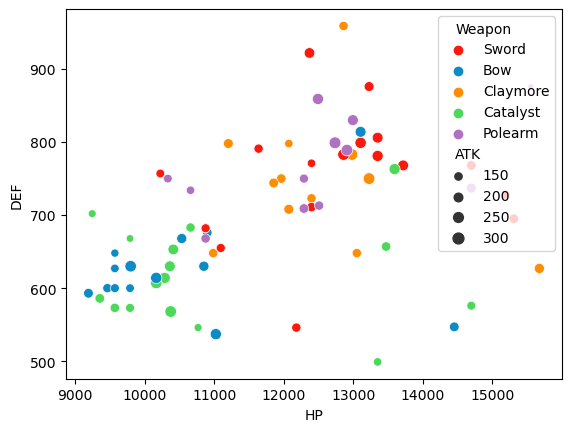

In [42]:
sns.scatterplot(
    data=personajes_df,
    x='HP',
    y='DEF',
    size='ATK',
    hue='Weapon',
)
plt.show()

Cantidad de ATK segun elemento

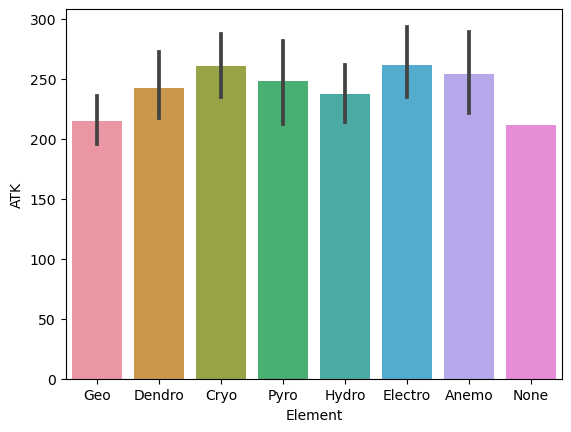

In [41]:
sns.barplot(
    data=personajes_df,
    x='Element',
    y='ATK',
)
plt.show()

Cantidad de ATK segun Arma

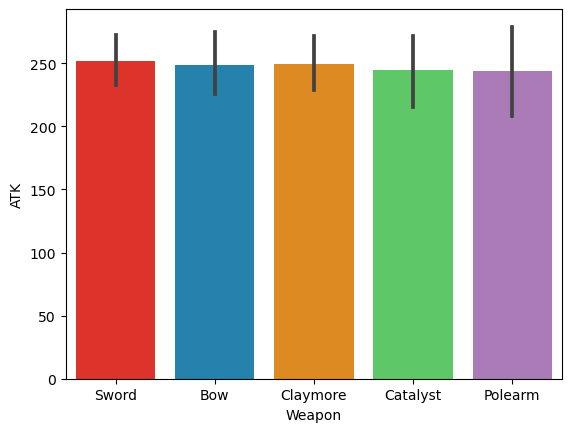

In [40]:
sns.barplot(
    data=personajes_df,
    x='Weapon',
    y='ATK',
)
plt.show()

Cantidad de ATK segun Elemento y Region

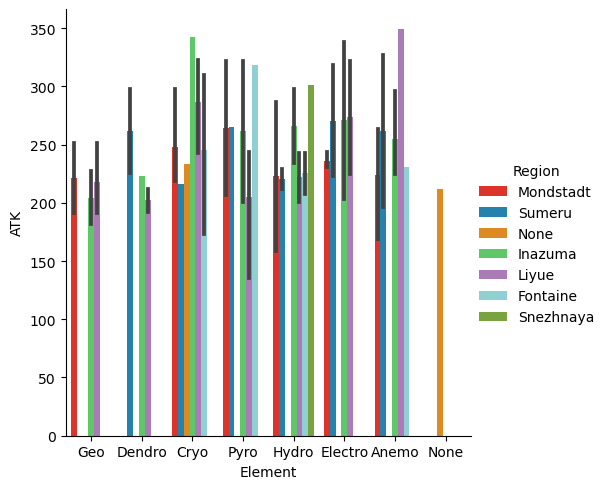

In [39]:
sns.catplot(
    data=personajes_df,
    x='Element',
    y='ATK',
    hue='Region',
    kind='bar'
)
plt.show()

Top 5 personajes con mayor ATK, segun su region

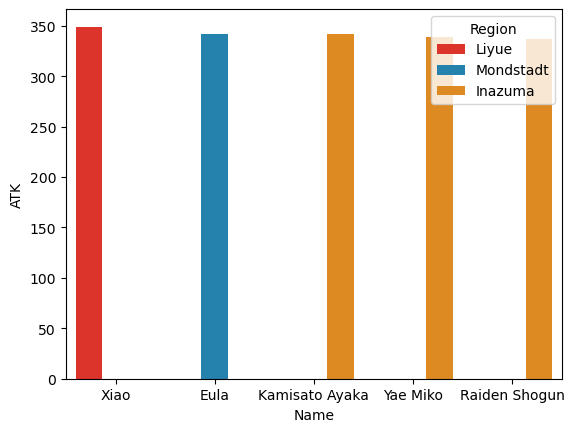

In [38]:
sns.barplot(
    data=personajes_df.nlargest(5, 'ATK'),
    x='Name',
    y='ATK',
    hue='Region'
)
plt.show()

Top 5 Personajes con mayor defensa, segun region

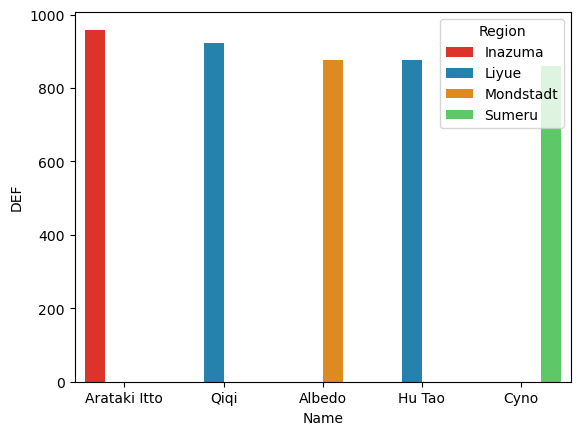

In [37]:
sns.barplot(
    data=personajes_df.nlargest(5, 'DEF'),
    x='Name',
    y='DEF',
    hue='Region'
)
plt.show()

Top 5 de personajes con mayor HP, segun Region

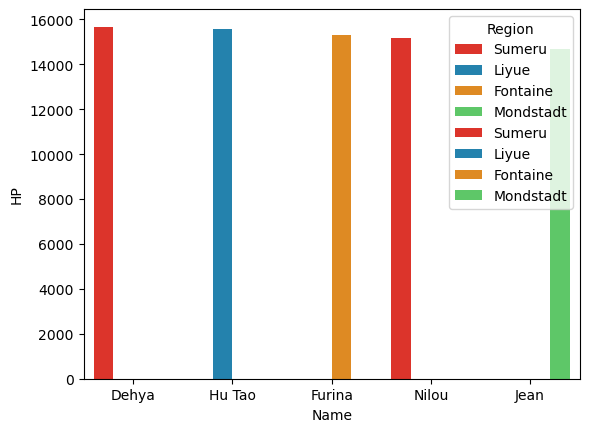

In [36]:
sns.barplot(
    data=personajes_df.nlargest(5, 'HP'),
    x='Name',
    y='HP',
    hue='Region'
)
plt.show()

Contrario a lo pensado, los personajes Geo no son los primeros en el rank de defensa a pesar de que son los que mas necesitan esta estadistica

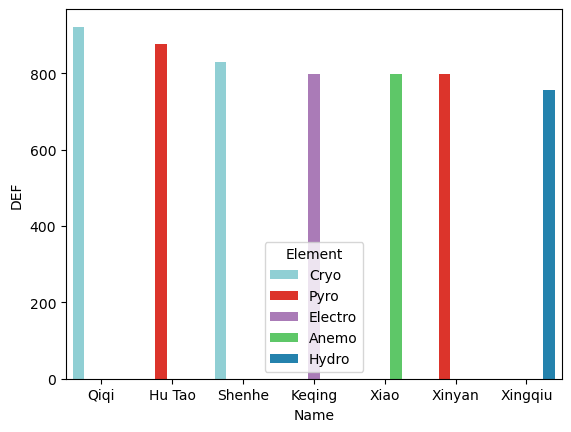

In [34]:
sns.barplot(
    data=personajes_df[personajes_df['Region'] == 'Liyue'].nlargest(7, 'DEF'),
    x='Name',
    y='DEF',
    hue='Element',
    palette= paletaColoresElementos
)
plt.show()

In [65]:
personajes_df.count()

Name              75
Element           75
Weapon            75
Region            75
HP                75
ATK               75
DEF               75
Ascension Stat    75
dtype: int64

Top 7 de personajes con mas HP y que escalan con HP al momento de ascender

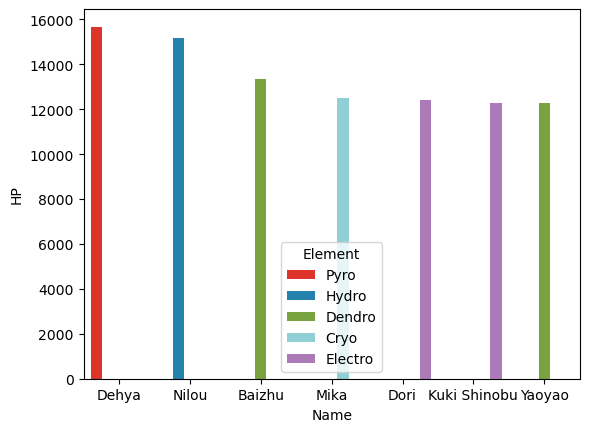

In [54]:
sns.barplot(
    data=personajes_df[personajes_df['Ascension Stat'] == 'HP'].nlargest(7, 'HP'),
    x='Name',
    y='HP',
    hue='Element',
    palette= paletaColoresElementos
)
plt.show()

Top 7 de personajes con mas ATK y que escalan con ATK al momento de ascender

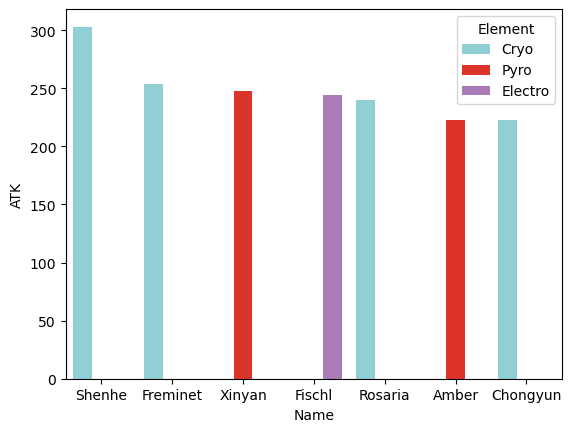

In [58]:
sns.barplot(
    data=personajes_df[personajes_df['Ascension Stat'] == 'ATK'].nlargest(7, 'ATK'),
    x='Name',
    y='ATK',
    hue='Element',
    palette= paletaColoresElementos
)
plt.show()

Top 7 de personajes con mas ATK y que escalan con CRIT DMG al momento de ascender

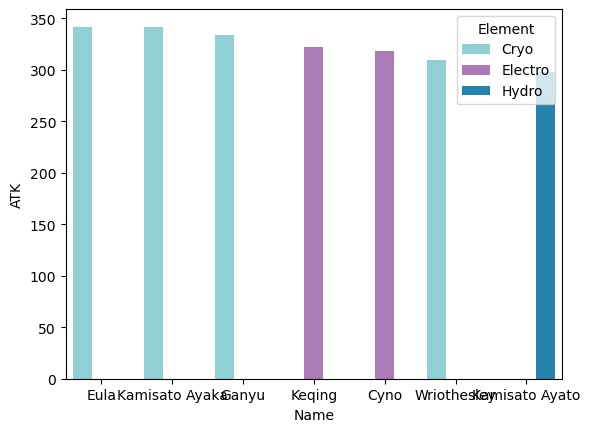

In [60]:
sns.barplot(
    data=personajes_df[personajes_df['Ascension Stat'] == 'CRIT DMG'].nlargest(7, 'ATK'),
    x='Name',
    y='ATK',
    hue='Element',
    palette= paletaColoresElementos
)
plt.show()

Se puede observar una tendencia en donde personajes de elemento CRYO lideran el top en daño en diferentes ocasiones

Por otro lado, se crea un TOP 7 segun arma y Stats

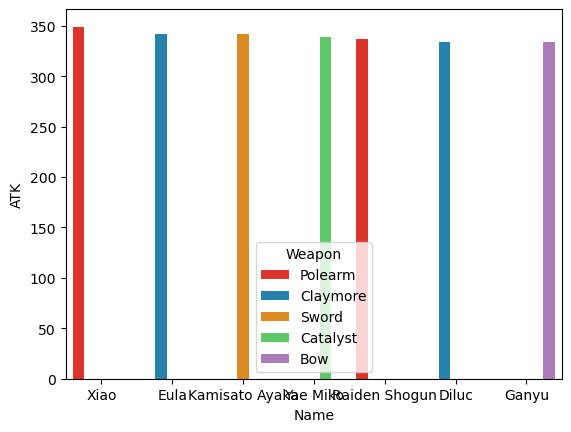

In [69]:
sns.barplot(
    data=personajes_df.nlargest(7, 'ATK'),
    x='Name',
    y='ATK',
    hue='Weapon',
)
plt.show()

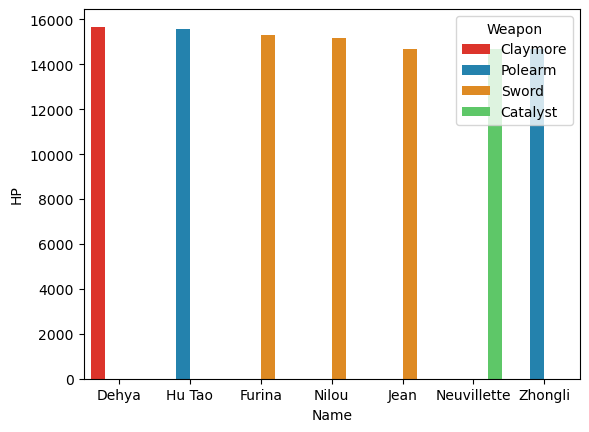

In [70]:
sns.barplot(
    data=personajes_df.nlargest(7, 'HP'),
    x='Name',
    y='HP',
    hue='Weapon',
)
plt.show()

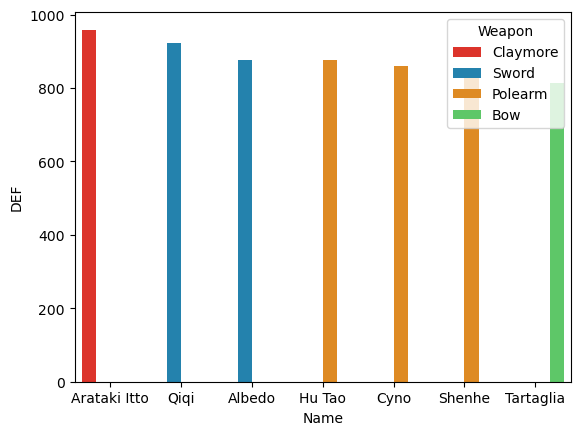

In [71]:
sns.barplot(
    data=personajes_df.nlargest(7, 'DEF'),
    x='Name',
    y='DEF',
    hue='Weapon',
)
plt.show()